In [1]:
import pandas as pd

customers = pd.read_csv("/content/Customers.csv")
products = pd.read_csv("/content/Products.csv")
transactions = pd.read_csv("/content/Transactions.csv")

customer_transactions = pd.merge(transactions, customers, on="CustomerID", how="inner")

merged_data = pd.merge(customer_transactions, products, on="ProductID", how="inner")

print(merged_data.head())

merged_data.to_csv("Merged_Dataset.csv", index=False)


  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region  SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe  2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia  2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe  2024-04-04   
3      601.36   300.68  Travis Campbell  South America  2024-04-11   
4      902.04   300.68    Timothy Perez         Europe  2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bluetooth Speaker

In [11]:
merged_data.isnull().sum()

,0
TransactionID,0
CustomerID,0
ProductID,0
TransactionDate,0
Quantity,0
TotalValue,0
Price_x,0
CustomerName,0
Region,0
SignupDate,0


In [12]:
merged_data.describe()

,Quantity,TotalValue,Price_x,Price_y
count,1000.000000,1000.000000,1000.00000,1000.00000
mean,2.537000,689.995560,272.55407,272.55407
std,1.117981,493.144478,140.73639,140.73639
min,1.000000,16.080000,16.08000,16.08000
25%,2.000000,295.295000,147.95000,147.95000
50%,3.000000,588.880000,299.93000,299.93000
75%,4.000000,1011.660000,404.40000,404.40000
max,4.000000,1991.040000,497.76000,497.76000


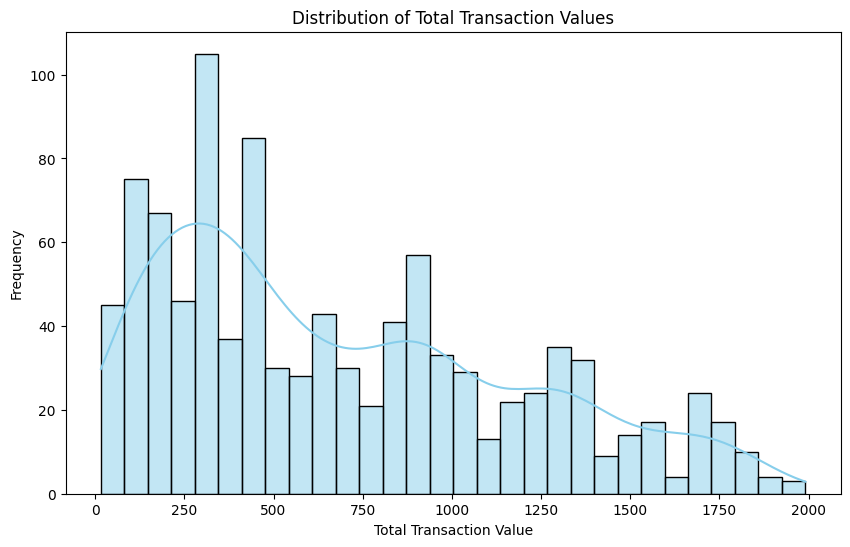

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['TotalValue'], kde=True, bins=30, color="skyblue")
plt.title("Distribution of Total Transaction Values")
plt.xlabel("Total Transaction Value")
plt.ylabel("Frequency")
plt.show()

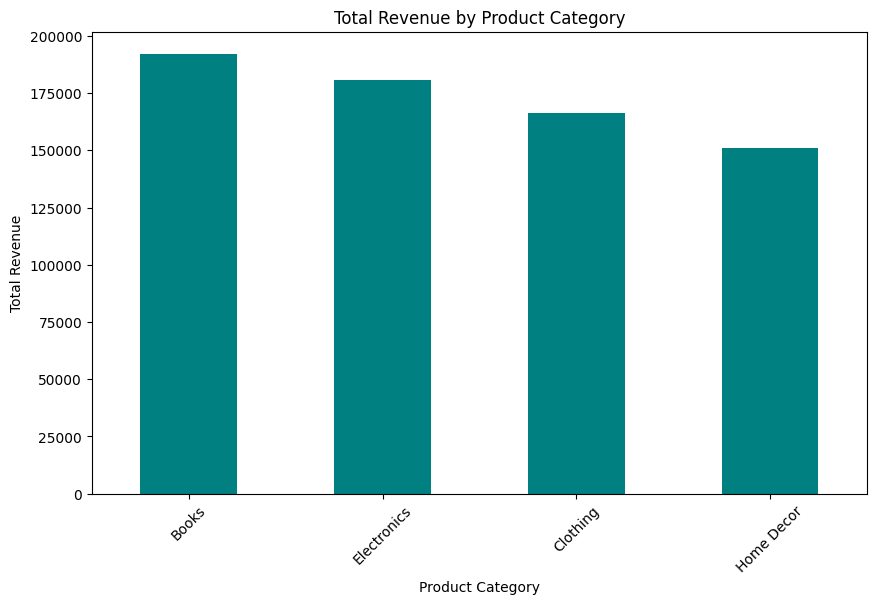

In [9]:
revenue_by_category = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
revenue_by_category.plot(kind='bar', color="teal")
plt.title("Total Revenue by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()

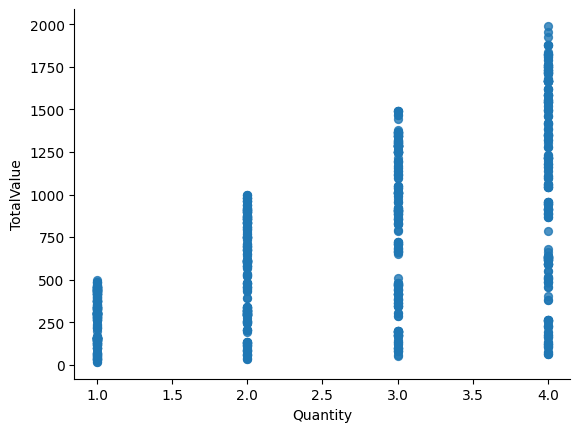

In [5]:
# @title Quantity vs TotalValue

from matplotlib import pyplot as plt
merged_data.plot(kind='scatter', x='Quantity', y='TotalValue', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

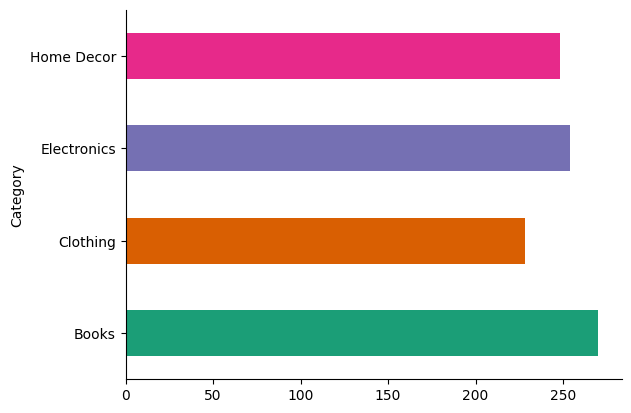

In [4]:
from matplotlib import pyplot as plt
import seaborn as sns
merged_data.groupby('Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

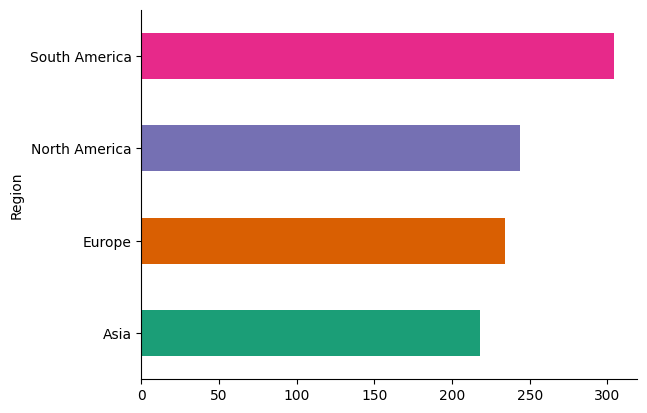

In [3]:
from matplotlib import pyplot as plt
import seaborn as sns
merged_data.groupby('Region').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

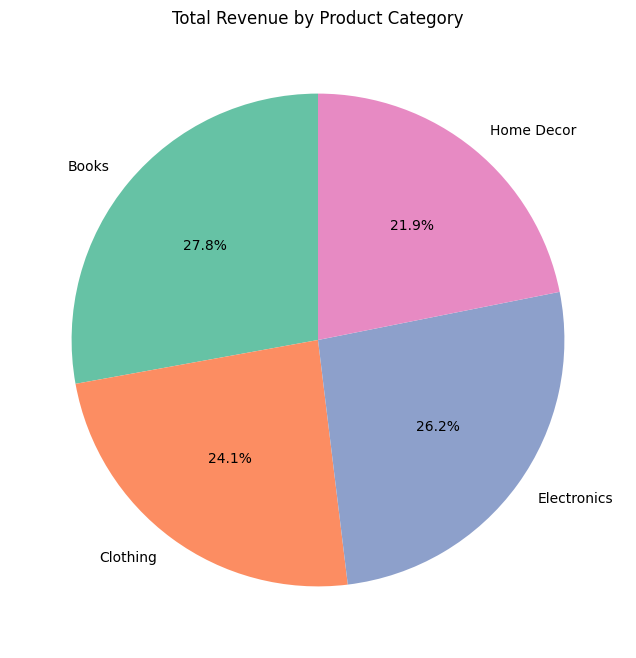

In [10]:
revenue_by_category = merged_data.groupby('Category')['TotalValue'].sum()

# Plot total revenue by category in a pie chart
plt.figure(figsize=(8, 8))
revenue_by_category.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))
plt.title("Total Revenue by Product Category")
plt.ylabel("")  # Remove default ylabel
plt.show()

**Insights We can Obtain From the Above EDA Process**



*   More Number of Transactions are in the range of 300-350.
*   The Books sales provides more Revenue than other Category.


*   Mostly the South American's is recorded in the given Dataset.
*   Books and Clothing took more than 50% of total revenue.



